## Load Dataset

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# to draw graph in notebook
%matplotlib inline

#solve problem about korean minus font in graph
mpl.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')

In [3]:
train =pd.read_csv("data/train.csv",parse_dates=["datetime"])
train.shape

(10886, 12)

In [4]:
test=pd.read_csv("data/test.csv",parse_dates=["datetime"])
test.shape

(6493, 9)

## Feature Engineering

In [5]:
train["year"]=train["datetime"].dt.year
train["month"]=train["datetime"].dt.month
train["day"]=train["datetime"].dt.day
train["hour"]=train["datetime"].dt.hour
train["minute"]=train["datetime"].dt.minute
train["second"]=train["datetime"].dt.second
train.shape

(10886, 18)

In [6]:
train["dayofweek"]=train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [7]:
test["year"]=test["datetime"].dt.year
test["month"]=test["datetime"].dt.month
test["day"]=test["datetime"].dt.day
test["hour"]=test["datetime"].dt.hour
test["minute"]=test["datetime"].dt.minute
test["second"]=test["datetime"].dt.second
test["dayofweek"]=test["datetime"].dt.dayofweek
test["dayofweek"]=test["datetime"].dt.dayofweek
test.shape

(6493, 16)

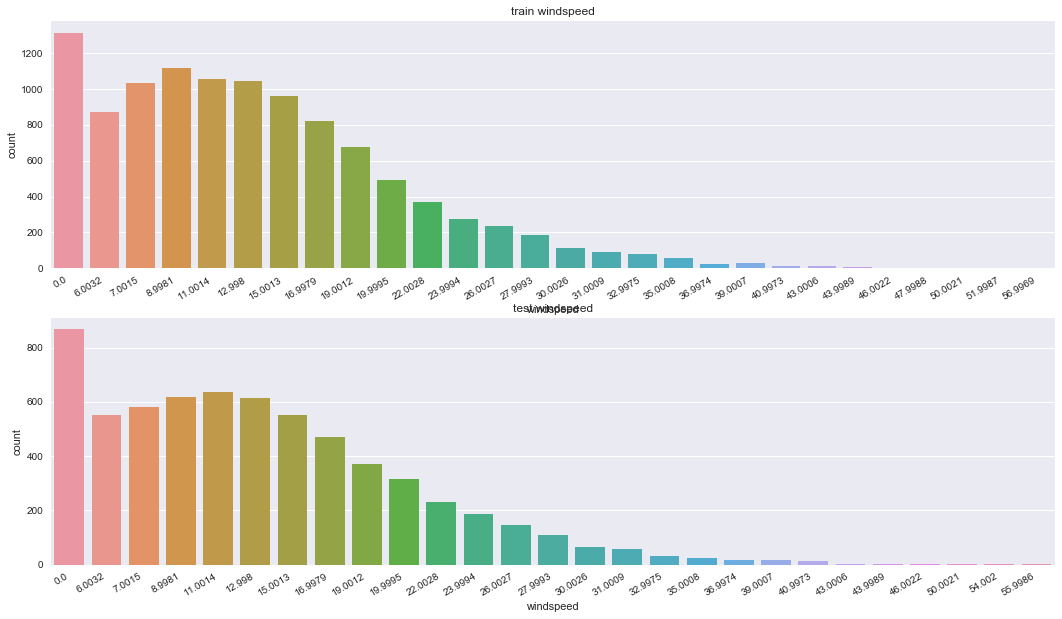

In [8]:
#widdspeed

fig, axes =plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30,ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30,ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])




I think zero values were recorded when there were no data.
so i should take machine learning method to predict the values of zero value in windspeed.

In [9]:
# separate windspeed is 0 and windspeed is not 0
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)


(1313, 19)
(9573, 19)


In [10]:
# put on data using machine learing 

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    #separate data
    dataWind0 = data.loc[train['windspeed'] == 0]
    dataWindNot0 = train.loc[train['windspeed'] != 0]
    
    # choice feature to predict windspeed
    wCol=["season","weather","humidity","month","temp","year","atemp"]   
    
    # change type of data windspeed is not 0 to string  
    dataWindNot0["windspeed"]= dataWindNot0["windspeed"].astype("str")
    
    # using randomforestclassifier
    rfModel_wind=RandomForestClassifier()
    
    
    #be learned windspeed underlying feature values in wCol data 
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0["windspeed"])
    
    #predict windspeed for data with 0 recode, based on learned values
    wind0Values = rfModel_wind.predict(X= dataWind0[wCol])
    
    # to compare values
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    # predicted values put on data 
    predictWind0["windspeed"]=wind0Values
    
    # to combine dataframe
    data= predictWindNot0.append(predictWind0)
    
    # datatype of windspeed assign type " float"
    data["windspeed"]=data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    data.drop('index',inplace=True,axis=1)
    
    return data
    

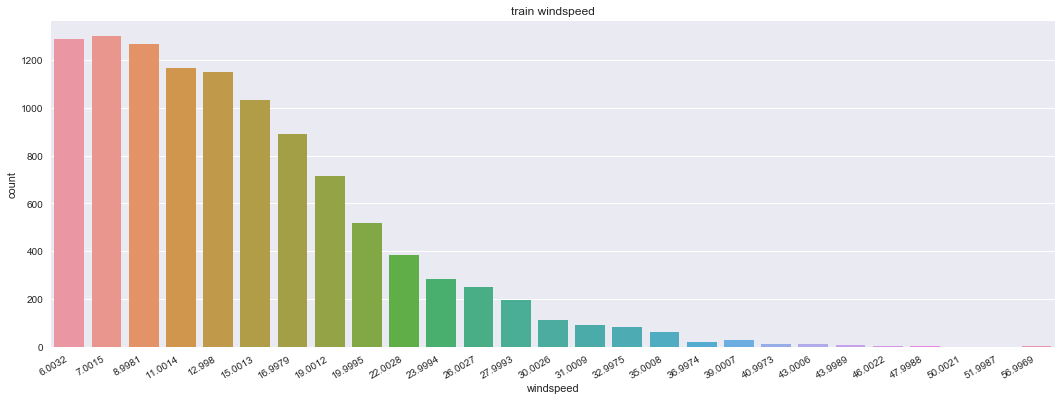

In [11]:
train = predict_windspeed(train)

fig, ax1= plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30,ha='right')
ax1.set(ylabel='Count', title = 'train windspeed')
sns.countplot(data=train,x="windspeed",ax=ax1)

## Feature Selection
- have to divide signal and noise
- a large number of features don't always give good performance 
- should to add and change features one at a time, and remove any poorly performing features

In [13]:
# categorical data AND continuous data
# continuous data = ["temp","humidity","windspeed","atemp"]
# type of categorical data change to "category"

categorical_feature_names=["season","holiday","workingday",
                          "weather","dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var]=train[var].astype("category")
    test[var]=test[var].astype("category")

In [14]:
feature_names=["season","weather","temp","atemp","humidity",
               "windspeed","year","hour","dayofweek","holiday","workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [15]:
X_train=train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [16]:
X_test=test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [17]:
label_name="count"

y_train=train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [18]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    difference = log_predict - log_actual
    difference = np.square(difference)

    mean_difference = difference.mean()

    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## RandomForest

In [20]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list= []


# the higher n_estomator value , the higher estimator 
model = RandomForestRegressor(n_estimators=100, 
                             n_jobs=-1,
                             random_state=0)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [23]:
%time score= cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score=score.mean()

print("Score = {0:.5f}".format(score))

CPU times: user 47.1 s, sys: 1.34 s, total: 48.4 s
Wall time: 15.4 s
Score = 0.33129


## Train

In [24]:
# make that learn , fitting 

model.fit(X_train, y_train)
  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [25]:
# predict

predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]


(6493,)


array([  12.66,    5.09,    4.37,    3.57,    3.14,    6.18,   38.54,
        105.11,  232.68,  136.11])

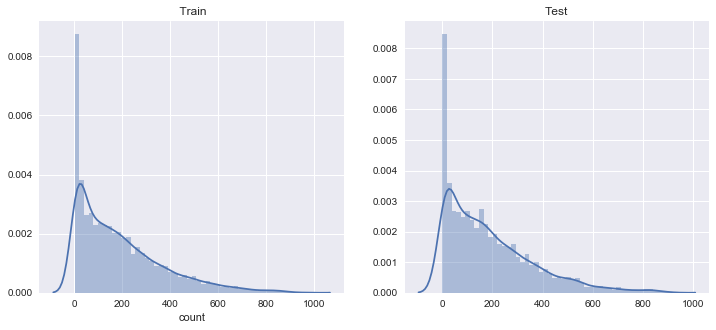

In [27]:
# to draw graph predicted data
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)

sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title = " Train")
sns.distplot(predictions,ax=ax2, bins=50 )
ax2.set(title = "Test")




## Submit

In [28]:
submission = pd.read_csv("data/sampleSubmission.csv")

In [29]:
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
5,2011-01-20 05:00:00,0
6,2011-01-20 06:00:00,0
7,2011-01-20 07:00:00,0
8,2011-01-20 08:00:00,0
9,2011-01-20 09:00:00,0


In [30]:
submission["count"]=predictions

In [31]:
print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.66
1,2011-01-20 01:00:00,5.09
2,2011-01-20 02:00:00,4.37
3,2011-01-20 03:00:00,3.57
4,2011-01-20 04:00:00,3.14


In [32]:
submission.to_csv("data/Score_{0:.5f}_submission.csv".format(score), index=False)

In [33]:
431/3501

0.12310768351899458